In [1]:
# This is required to show the plots in the notebook
%matplotlib notebook

In [2]:
import pandas as pd # Required for reading CSV file to DataFrame
import pycomlink as pycml 

All the work you do with `pycomlink` will be based on the `Comlink` object, which represents one CML between two sites and with an arbitrary number of channels, i.e. the different connections between the two sites, typically one for each direction.

To get a `Comlink` object from you raw data which is probably in a CSV file, do the following

1. Read in the CSV file into a `DataFrame` using the Python package `pandas`
1. Reformat the `DataFrame` according to the convenctions of `pycomlink`
1. Prepare the necessary metadata for the `ComlinkChannel`s and the `Comlink` object
1. Build `ComlinkChannel` objects for each channel, i.e. each pair of TX and RX time series that belong to one CML
1. Build a `Comlink` from the channels

Then you are set to go and use all the `pycomlink` functionality.


# Read in CML data from CSV file

Use the fantastic pandas CSV reader. In this case the time stamps are in the first column, hence set `index_col=0` and can automatically be parsed to datetime objects, hence set `parse_dates=True`.

In [3]:
df = pd.read_csv('example_data/gap0_gap4_2012.csv', parse_dates=True, index_col=0)

In [4]:
df.head()

,rsl
time,
2012-05-01 00:00:00,-40.565
2012-05-01 00:01:00,-40.594
2012-05-01 00:02:00,-40.565
2012-05-01 00:03:00,-40.565
2012-05-01 00:04:00,-40.565


`pycomlink` expects a fixed naming convention for the data in the DataFrames. The columns have to be named `rx` and `tx`. Hence, rename ` rsl` here to `rx` and add a columne with the constant `tx` level, which was 20 dBm in this case. Please note that you always have to provide the `tx` level even if it is constat all the time. You can specify that TX is constant by passing `atpc='off'`.

In [5]:
# Rename the columns for the RX level
df.columns = ['rx']

In [6]:
df

,rx
time,
2012-05-01 00:00:00,-40.565
2012-05-01 00:01:00,-40.594
2012-05-01 00:02:00,-40.565
2012-05-01 00:03:00,-40.565
2012-05-01 00:04:00,-40.565
2012-05-01 00:05:00,-40.594
2012-05-01 00:06:00,-40.565
2012-05-01 00:07:00,-40.565
2012-05-01 00:08:00,-40.594


In [7]:
# Add a constant TX level
df['tx'] = 20

In [8]:
df

,rx,tx
time,,
2012-05-01 00:00:00,-40.565,20
2012-05-01 00:01:00,-40.594,20
2012-05-01 00:02:00,-40.565,20
2012-05-01 00:03:00,-40.565,20
2012-05-01 00:04:00,-40.565,20
2012-05-01 00:05:00,-40.594,20
2012-05-01 00:06:00,-40.565,20
2012-05-01 00:07:00,-40.565,20
2012-05-01 00:08:00,-40.594,20


# Prepare the necessary metadata 

In [9]:
ch_metadata =   {
    'frequency': 18.7 * 1e9, # Frequency in Hz
    'polarization': 'V', 
    'channel_id': 'channel_xy',
    'atpc': 'off'} # This means that TX level is constant

cml_metadata = {
    'site_a_latitude': 50.50, # Some fake coordinates
    'site_a_longitude': 11.11,
    'site_b_latitude': 50.59,
    'site_b_longitude': 11.112,
    'cml_id': 'XY_1234'}

# Build a `ComlinkChannel` object 

In [10]:
cml_ch = pycml.ComlinkChannel(df, metadata=ch_metadata)

In [11]:
cml_ch

,rx,tx,txrx
time,,,
2012-05-01 00:00:00,-40.565,20,60.565
2012-05-01 00:01:00,-40.594,20,60.594
2012-05-01 00:02:00,-40.565,20,60.565
2012-05-01 00:03:00,-40.565,20,60.565
2012-05-01 00:04:00,-40.565,20,60.565
2012-05-01 00:05:00,-40.594,20,60.594
2012-05-01 00:06:00,-40.565,20,60.565
2012-05-01 00:07:00,-40.565,20,60.565
2012-05-01 00:08:00,-40.594,20,60.594


# Build a `Comlink` object with the one channel from above

In [12]:
cml = pycml.Comlink(channels=cml_ch, metadata=cml_metadata)

# Look at the contents of the CML 

In [13]:
cml

,rx,tx,txrx
time,,,
2012-05-01 00:00:00,-40.565,20,60.565
2012-05-01 00:01:00,-40.594,20,60.594
2012-05-01 00:02:00,-40.565,20,60.565
2012-05-01 00:03:00,-40.565,20,60.565
2012-05-01 00:04:00,-40.565,20,60.565
2012-05-01 00:05:00,-40.594,20,60.594
2012-05-01 00:06:00,-40.565,20,60.565
2012-05-01 00:07:00,-40.565,20,60.565
2012-05-01 00:08:00,-40.594,20,60.594


<IPython.core.display.Javascript object>


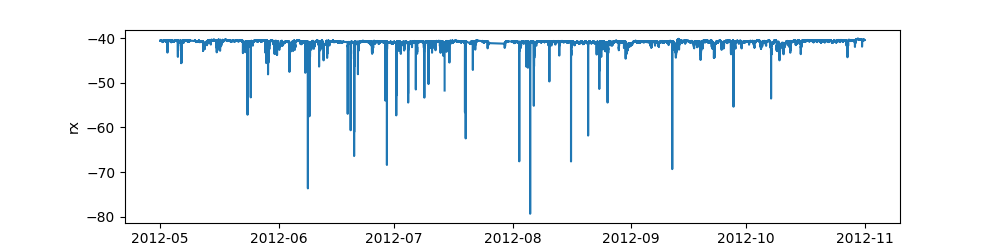

In [14]:
cml.plot_data(['rx']);

In [15]:
cml.plot_map()

# In case your CML has several channels, you can pass a list of channels 

In [16]:
cml_ch_1 = pycml.ComlinkChannel(df, metadata=ch_metadata)
df.rx = df.rx - 1.3
cml_ch_2 = pycml.ComlinkChannel(df, metadata=ch_metadata)

cml = pycml.Comlink(channels=[cml_ch_1, cml_ch_2], metadata=cml_metadata)

In [17]:
cml

,rx,tx,txrx
time,,,
2012-05-01 00:00:00,-40.565,20,60.565
2012-05-01 00:01:00,-40.594,20,60.594
2012-05-01 00:02:00,-40.565,20,60.565
2012-05-01 00:03:00,-40.565,20,60.565
2012-05-01 00:04:00,-40.565,20,60.565
2012-05-01 00:05:00,-40.594,20,60.594
2012-05-01 00:06:00,-40.565,20,60.565
2012-05-01 00:07:00,-40.565,20,60.565
2012-05-01 00:08:00,-40.594,20,60.594


<IPython.core.display.Javascript object>


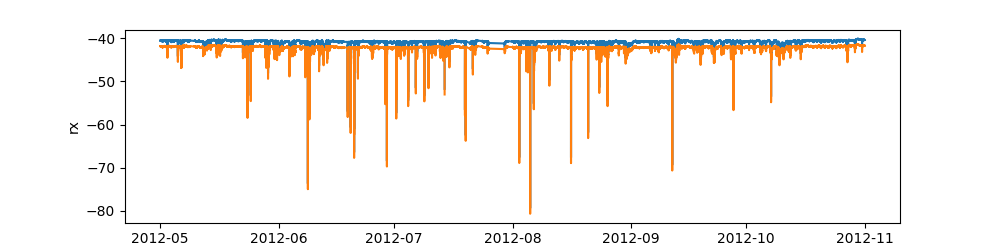

In [18]:
cml.plot_data();

# Run typicall processing
(see other notebooks for more details on this)

In [19]:
cml.process.wet_dry.std_dev(window_length=100, threshold=0.3)
cml.process.baseline.linear()
cml.process.baseline.calc_A()
cml.process.A_R.calc_R()

,rx,tx,txrx,wet,baseline,A,R
time,,,,,,,
2012-05-01 00:00:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:01:00,-40.594,20,60.594,False,60.594,0.0,0.0
2012-05-01 00:02:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:03:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:04:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:05:00,-40.594,20,60.594,False,60.594,0.0,0.0
2012-05-01 00:06:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:07:00,-40.565,20,60.565,False,60.565,0.0,0.0
2012-05-01 00:08:00,-40.594,20,60.594,False,60.594,0.0,0.0


<IPython.core.display.Javascript object>


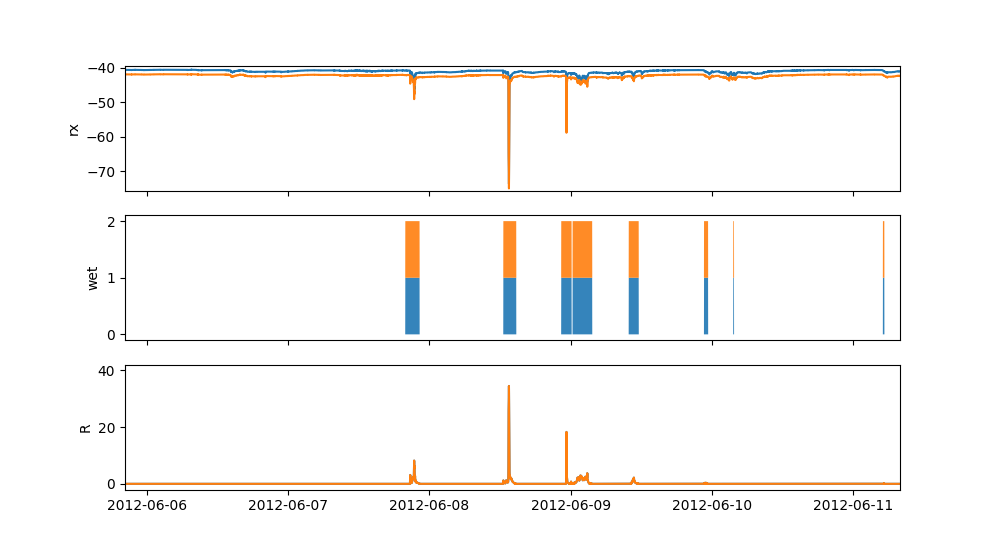

In [20]:
cml.plot_data(['rx', 'wet', 'R']);